In [38]:
import sounddevice as sd
import os
import winsound
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.fftpack import fft, fftshift

In [39]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [40]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

In [41]:
fs = 44100

In [42]:
file = "anovo.wav"

In [43]:
sd.default.samplerate = 44100
audio, samplerate = sf.read(file)
nAudio = audio[:,1]
sd.play(nAudio)

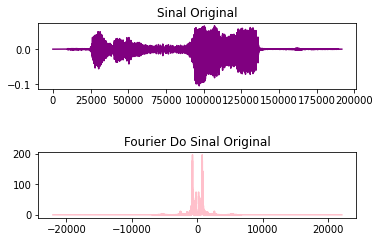

In [44]:
X, Y = calcFFT(nAudio, fs)

figure, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(2,1,1)
plt.title("Sinal Original")
plt.plot(nAudio, 'purple')
plt.subplot(2, 1, 2)
plt.title("Fourier Do Sinal Original")
plt.plot(X, np.abs(Y), 'pink')
figure.tight_layout(pad=3.0)

In [45]:
normAudio = nAudio/-min(nAudio)
X, Y = calcFFT(normAudio, fs)

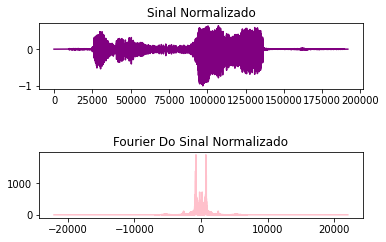

In [46]:
figure, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(2,1,1)
plt.title("Sinal Normalizado")
plt.plot(normAudio, 'purple')
plt.subplot(2, 1, 2)
plt.title("Fourier Do Sinal Normalizado")
plt.plot(X, np.abs(Y), 'pink')
figure.tight_layout(pad=3.0)

In [47]:
yFitrado = LPF(normAudio, 4000, fs)
X, Y = calcFFT(yFitrado, fs)

In [48]:
sd.play(yFitrado) #SOM OPACO :)

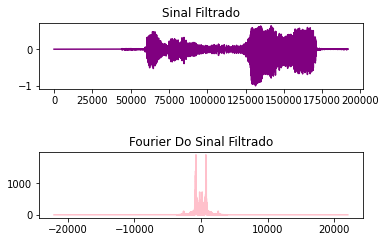

In [49]:
figure, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(2,1,1)
plt.title("Sinal Filtrado")
plt.plot(yFitrado, 'purple')
plt.subplot(2, 1, 2)
plt.title("Fourier Do Sinal Filtrado")
plt.plot(X, np.abs(Y), 'pink')
figure.tight_layout(pad=3.0)

In [50]:
portadora = 14000
t = np.linspace(0, len(nAudio)/fs, len(nAudio))
portadoraSig = np.cos(2*np.pi*portadora*t)
yMod = yFitrado*portadoraSig

# Fourier
X, Y = calcFFT(yMod, fs)

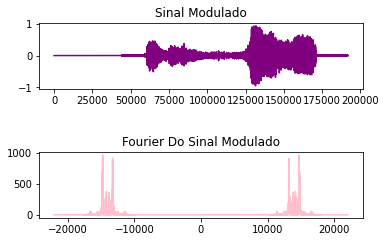

In [51]:
figure, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(2,1,1)
plt.title("Sinal Modulado")
plt.plot(yMod, 'purple')
plt.subplot(2, 1, 2)
plt.title("Fourier Do Sinal Modulado")
plt.plot(X, np.abs(Y), 'pink')
figure.tight_layout(pad=3.0)

In [52]:
sd.play(yMod)

# Demodulando

In [53]:
yDemod = yMod*portadoraSig
sd.play(yDemod)

In [54]:
X, Y = calcFFT(yDemod, fs)

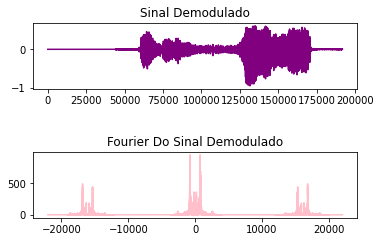

In [55]:
# Sinal demodulado 
figure, axes = plt.subplots(nrows=1, ncols=2)
plt.subplot(2,1,1)
plt.title("Sinal Demodulado")
plt.plot(yDemod, 'purple')
plt.subplot(2, 1, 2)
plt.title("Fourier Do Sinal Demodulado")
plt.plot(X, np.abs(Y), 'pink')
figure.tight_layout(pad=3.0)

In [ ]:
# OK!